In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50

## Preprocessing

In [2]:
### extract headers as they contain white spaces
colnames = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, nrows=1)
header = []
for i in range(0,32):
    header.append(colnames.iloc[0, i].strip())

### read data set
cancer = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, names = header, skiprows=1, index_col=False)


In [3]:
### Overview
print(header)
print(cancer.head())

['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr', 'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr', 'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr', 'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst', 'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst']
        ID class  radiusMean  textureMean  perimeterMean  areaMean  \
0   868682     B       11.43        15.39          73.06     399.8   
1   881972     M       17.05        19.08         113.40     895.0   
2   901315     B       10.57        20.22          70.15     338.3   
3  9112367     B       13.21        25.25          84.10     537.9   
4  8711202     M       17.68        20.74         117.40     963.7   

   smoothnessM

In [4]:
### check Data Types
cancer.info()
# class should be nominal
cancer["class"] = cancer["class"].astype("category")
### there are no missing values
cancer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
ID                        285 non-null int64
class                     285 non-null object
radiusMean                285 non-null float64
textureMean               285 non-null float64
perimeterMean             285 non-null float64
areaMean                  285 non-null float64
smoothnessMean            285 non-null float64
compactnessMean           285 non-null float64
concavityMean             285 non-null float64
concavePointsMean         285 non-null float64
symmetryMean              285 non-null float64
fractalDimensionMean      285 non-null float64
radiusStdErr              285 non-null float64
textureStdErr             285 non-null float64
perimeterStdErr           285 non-null float64
areaStdErr                285 non-null float64
smoothnessStdErr          285 non-null float64
compactnessStdErr         285 non-null float64
concavityStdErr           285 non-null float64
conca

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64

In [5]:
cancer.iloc[:,1:].describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,13.857832,19.310000,90.076070,625.102105,0.095960,0.101917,0.084848,0.046362,0.180695,0.062898,0.381560,1.265625,2.688862,35.582670,0.007287,0.025752,0.032762,0.012112,0.020977,0.003909,15.823884,25.665825,104.135123,823.488421,0.132186,0.249617,0.265468,0.112228,0.290091,0.083933
std,3.252277,4.277718,22.227367,310.526144,0.013481,0.048350,0.073680,0.034868,0.028748,0.007271,0.209815,0.604729,1.449513,28.148884,0.003228,0.017407,0.032761,0.006495,0.008446,0.002756,4.361540,6.128468,29.847173,482.465945,0.022661,0.151791,0.201241,0.063620,0.067542,0.018766
min,7.729000,9.710000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.003012,0.000000,0.000000,0.007882,0.000895,8.952000,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.570000,16.170000,74.200000,409.100000,0.086370,0.064920,0.030460,0.021680,0.161900,0.057810,0.235700,0.855400,1.670000,18.150000,0.005324,0.013310,0.015100,0.007711,0.015270,0.002248,12.840000,21.190000,83.850000,505.600000,0.117200,0.146000,0.116800,0.063430,0.247700,0.072070
50%,13.150000,18.910000,84.450000,536.900000,0.095940,0.092180,0.059280,0.032640,0.177800,0.061470,0.319700,1.169000,2.284000,24.280000,0.006494,0.021210,0.026110,0.011430,0.019160,0.003299,14.670000,25.440000,96.310000,657.000000,0.130300,0.211900,0.210200,0.099100,0.280400,0.079440
75%,15.490000,21.800000,102.500000,748.900000,0.104600,0.129600,0.120400,0.065760,0.195300,0.066080,0.474300,1.502000,3.312000,44.910000,0.008499,0.033680,0.043450,0.015380,0.023830,0.004672,18.070000,30.360000,121.200000,989.500000,0.146100,0.341600,0.382900,0.156100,0.316800,0.091870
max,27.220000,33.810000,182.100000,2250.000000,0.142500,0.283900,0.410800,0.187800,0.304000,0.097440,1.370000,4.885000,9.424000,176.500000,0.031130,0.100600,0.396000,0.052790,0.061460,0.029840,33.120000,45.410000,220.800000,3216.000000,0.222600,1.058000,1.105000,0.273300,0.663800,0.207500


## Statistical Analysis

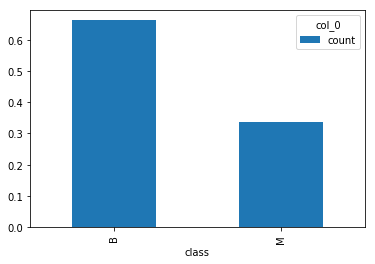

In [6]:
# class distribution
class_table = pd.crosstab(cancer["class"], columns = "count")
class_table = class_table/class_table.sum()
class_table.plot(kind = "bar")

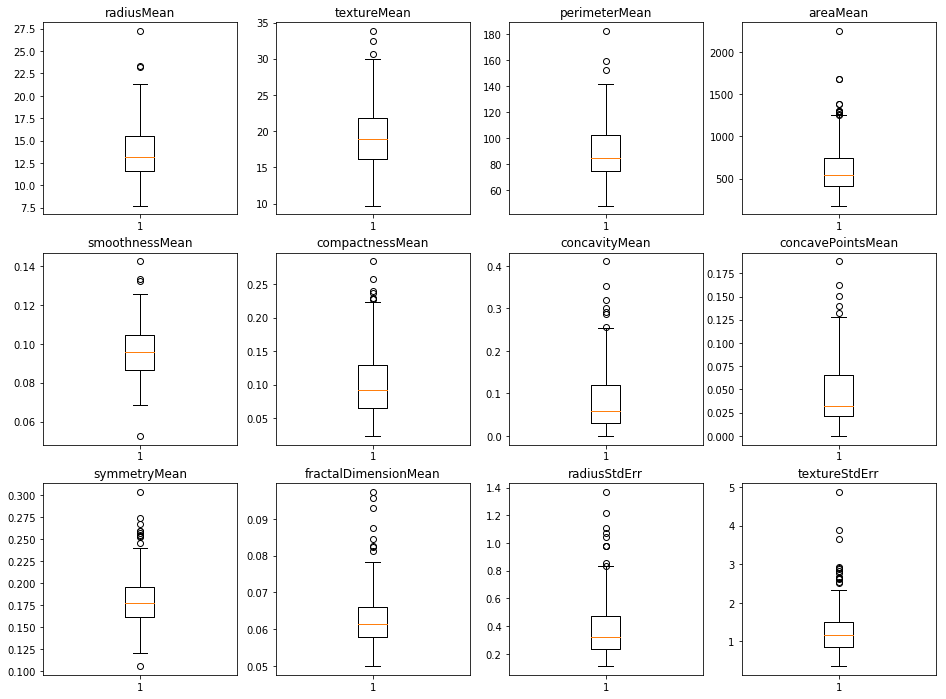

In [8]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
variable = 2
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### There are some outliers but the distributions seems normal to me. I suggest that we leave it like that or cut
#   extreme outliers like in areaMean to achieve more accuracy for the "average" cases which are more important in ML
#   as special cases are always hard to predict

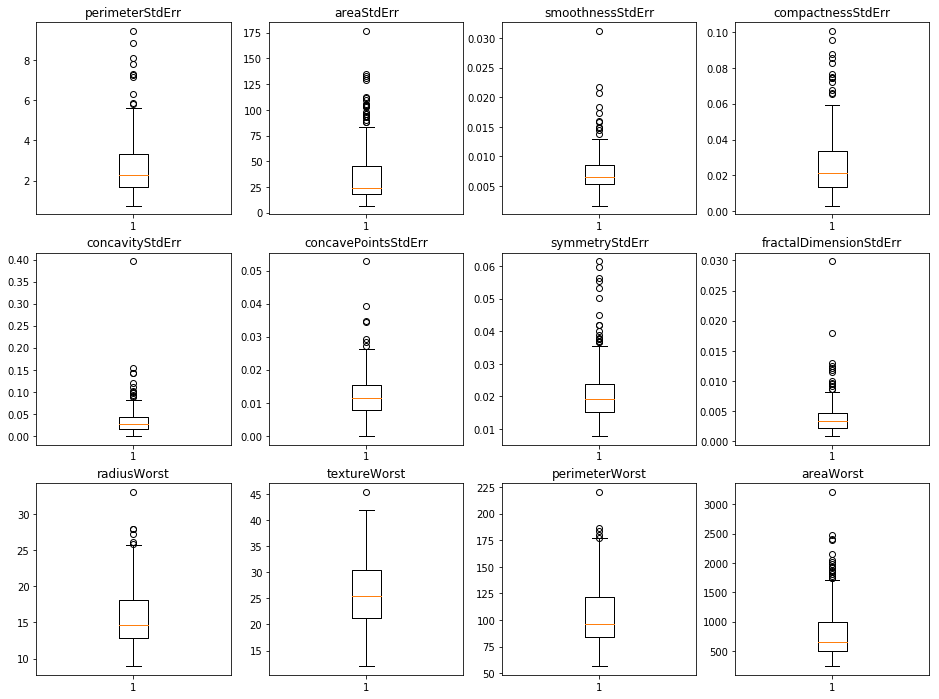

In [9]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### same is here. maybe cut some extreme outliers like concavityStdErr and others.

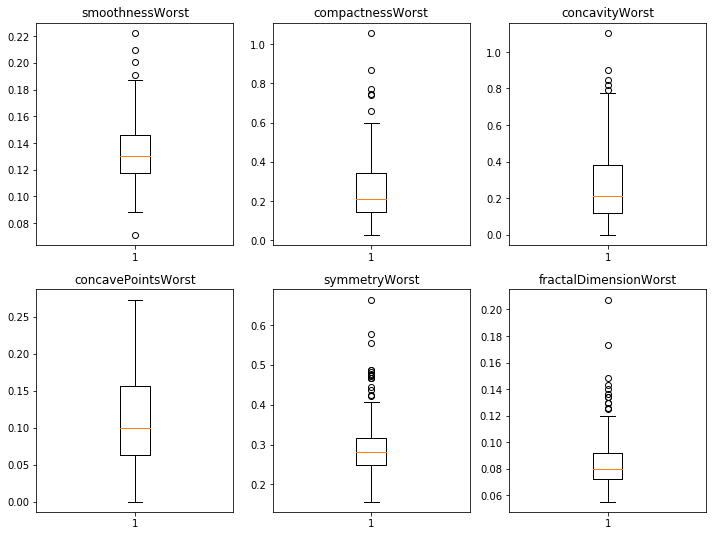

In [10]:
fig, axlist = plt.subplots(2,3,figsize=(12,9))
for row in range(0,2):
    for i in range(0,3):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1

### same

In [104]:
###
# 285 observations
# 32 columns(index 0 is ID and index 1 is classification var)
# all variable are floats and don't need to be further processed for now
# classification is binary (B, M)

280      869691
281      871149
282    84667401
283      912558
284      917080
Name: ID, dtype: int64

## Experiments

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

from sklearn.metrics import recall_score, precision_score

/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

## kNN

In [15]:
### Function to experiment with kNN
def knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute"):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    precision_mean = []
    precision_std = []
    recall_mean = []
    recall_std = []
    
    ### metrics for our analysis
    scoring = ["accuracy", "precision_micro", "recall_micro"]
    for i in range(2,101):
        knn = KNeighborsClassifier(i, weights=weights, algorithm = algorithm)
        scores = cross_validate(knn, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        precision_mean.append(scores["test_precision_micro"].mean())
        precision_std.append(scores["test_precision_micro"].std())
        recall_mean.append(scores["test_recall_micro"].mean())
        recall_std.append(scores["test_recall_micro"].std())
        
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    plt.plot(precision_mean)
    plt.plot(precision_std)
    plt.title("Precision")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,3)
    plt.plot(recall_mean)
    plt.plot(recall_std)
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

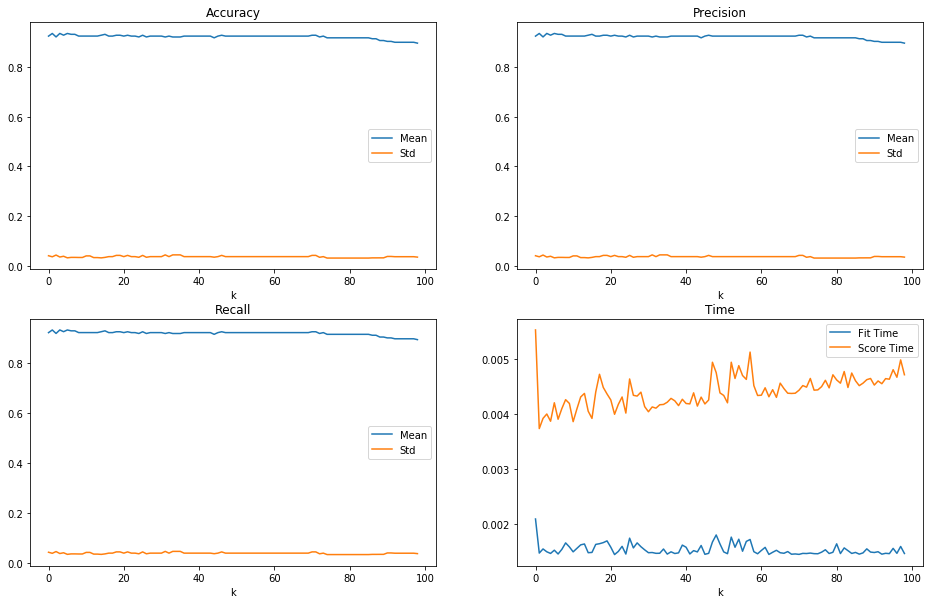

In [20]:
knn_test(Xdata, Ydata, weights="uniform", algorithm="brute")

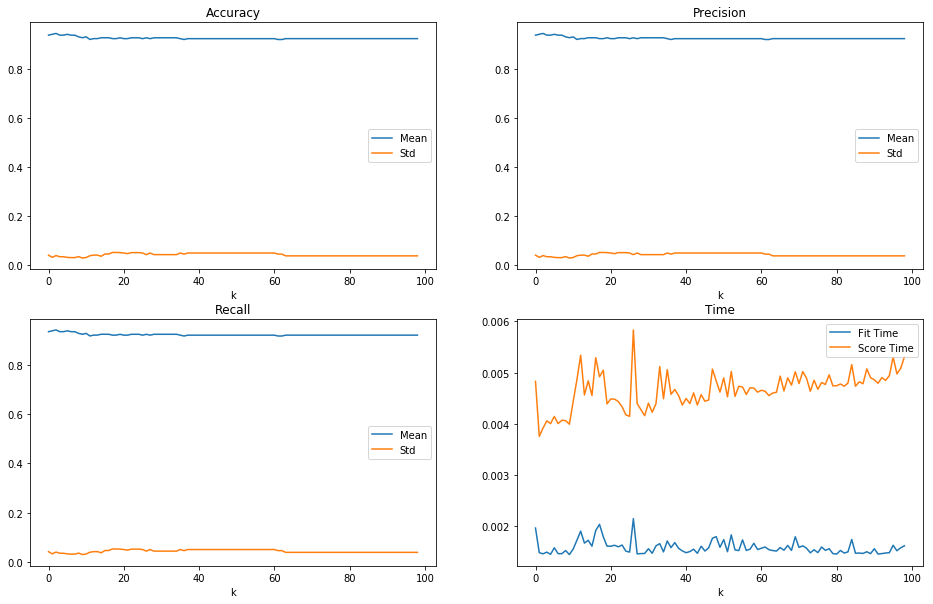

In [21]:
knn_test(Xdata, Ydata, weights="distance", algorithm="brute")

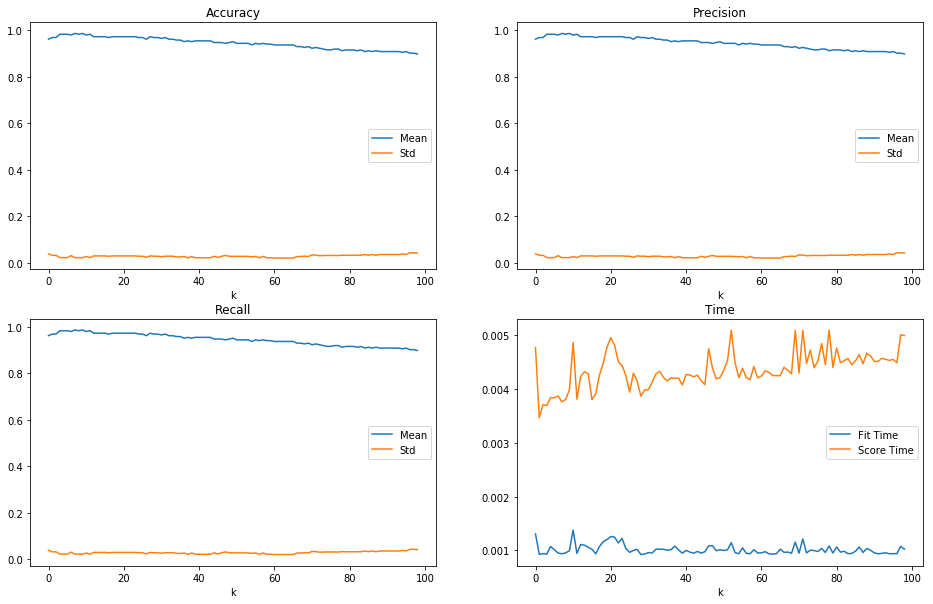

In [22]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="brute")

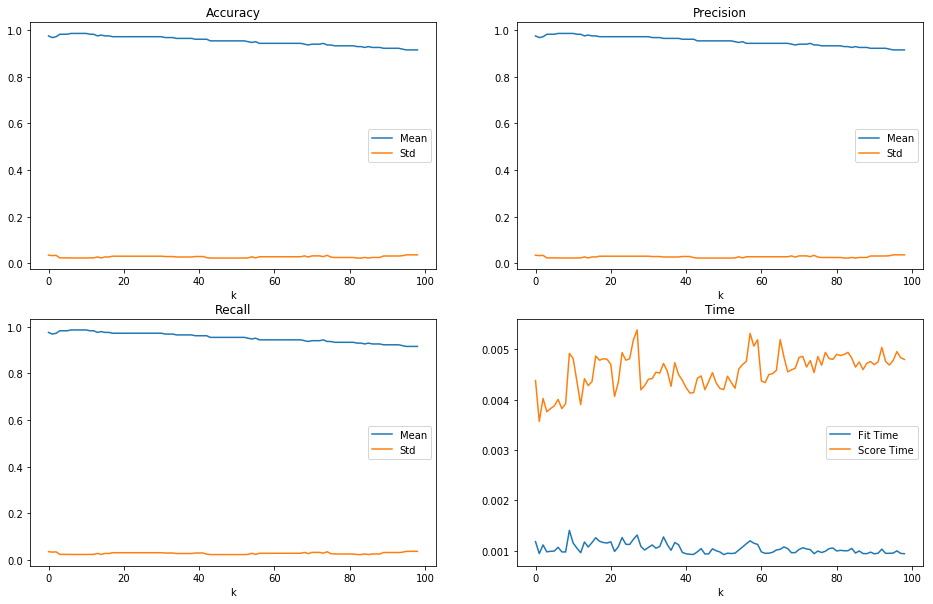

In [23]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm = "brute")

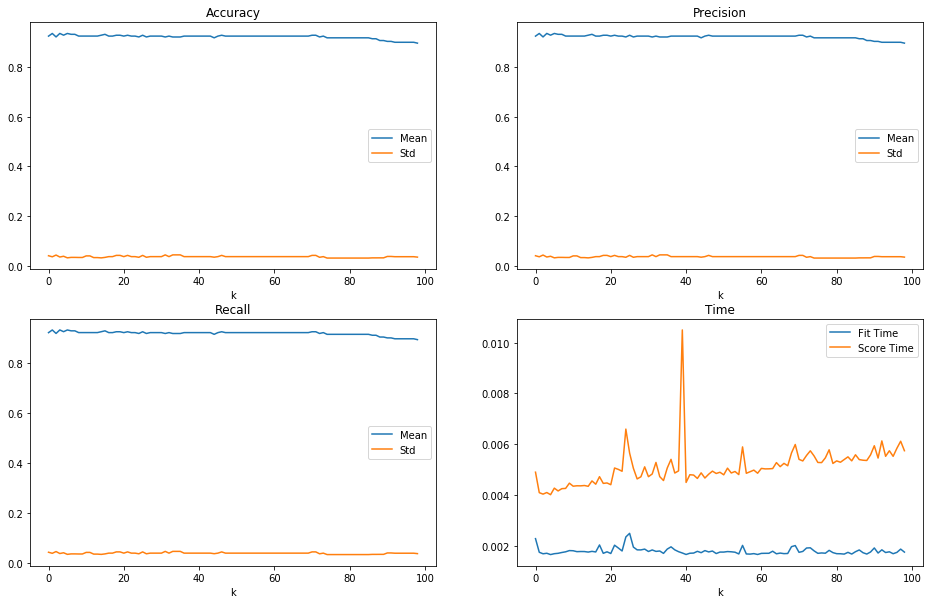

In [24]:
knn_test(Xdata, Ydata, weights="uniform", algorithm="kd_tree")

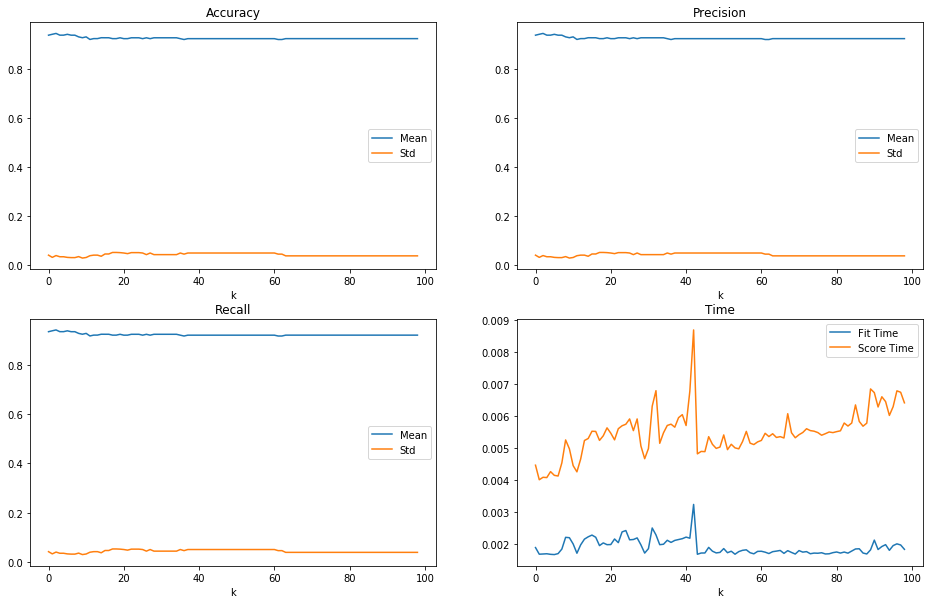

In [25]:
knn_test(Xdata, Ydata, weights="distance", algorithm="kd_tree")

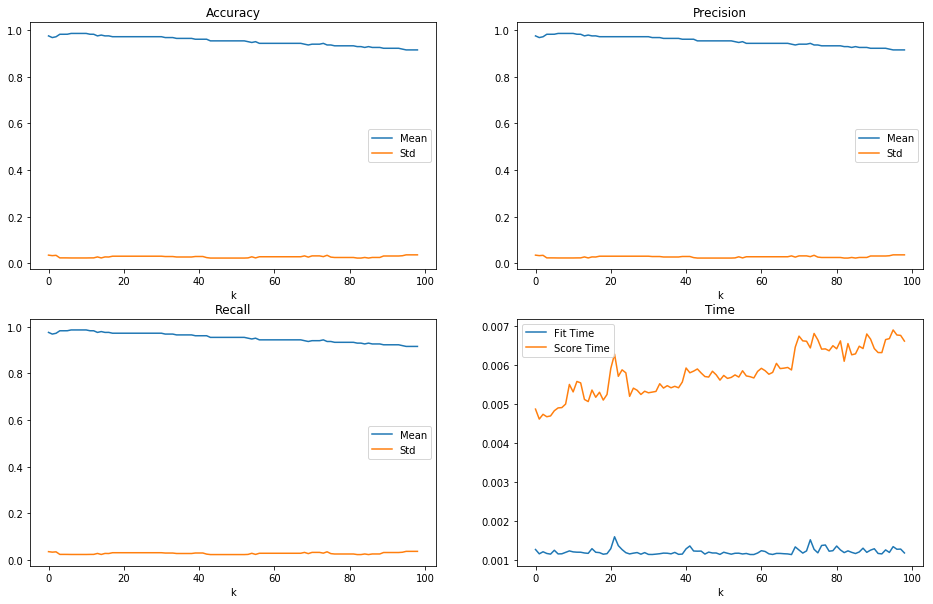

In [26]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm="kd_tree")

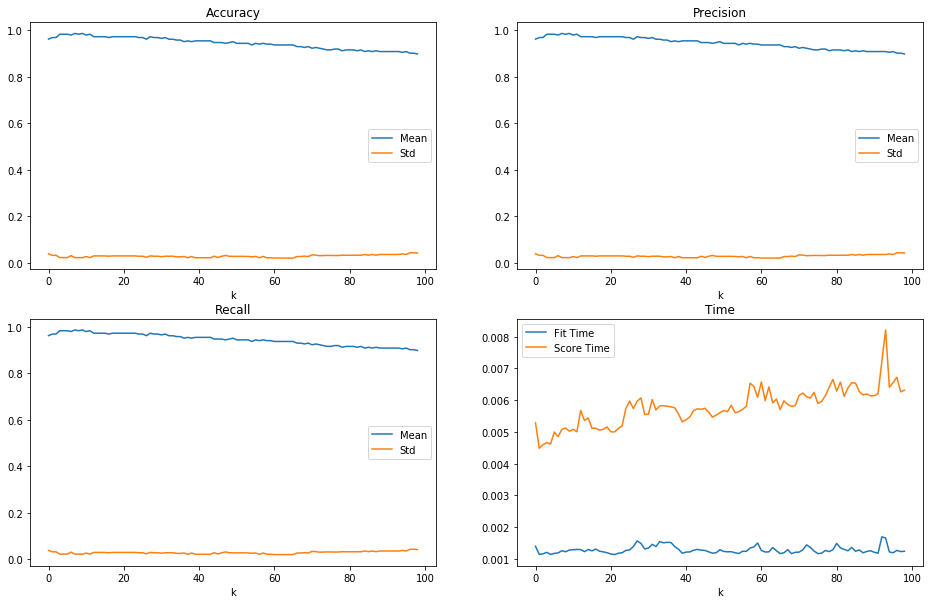

In [27]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="kd_tree")

## Naive Bayes

In [28]:
### Function for summary plot
def plot_summary(scores_mnb):
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(scores_mnb["test_accuracy"])
    plt.axhline(scores_mnb["test_accuracy"].mean(), color= "orange")
    plt.title("Accuracy")
    plt.subplot(2,2,2)
    plt.plot(scores_mnb["test_precision_micro"])
    plt.axhline(scores_mnb["test_precision_micro"].mean(), color= "orange")
    plt.title("Precision")
    plt.subplot(2,2,3)
    plt.plot(scores_mnb["test_recall_micro"])
    plt.axhline(scores_mnb["test_recall_micro"].mean(), color= "orange")
    plt.title("Recall")
    plt.subplot(2,2,4)
    plt.plot(scores_mnb["fit_time"])
    plt.plot(scores_mnb["score_time"])
    plt.title("Time")
    plt.legend(("Fit Time", "Score Time"))

In [32]:
scoring = ["accuracy", "precision_micro", "recall_micro"]
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

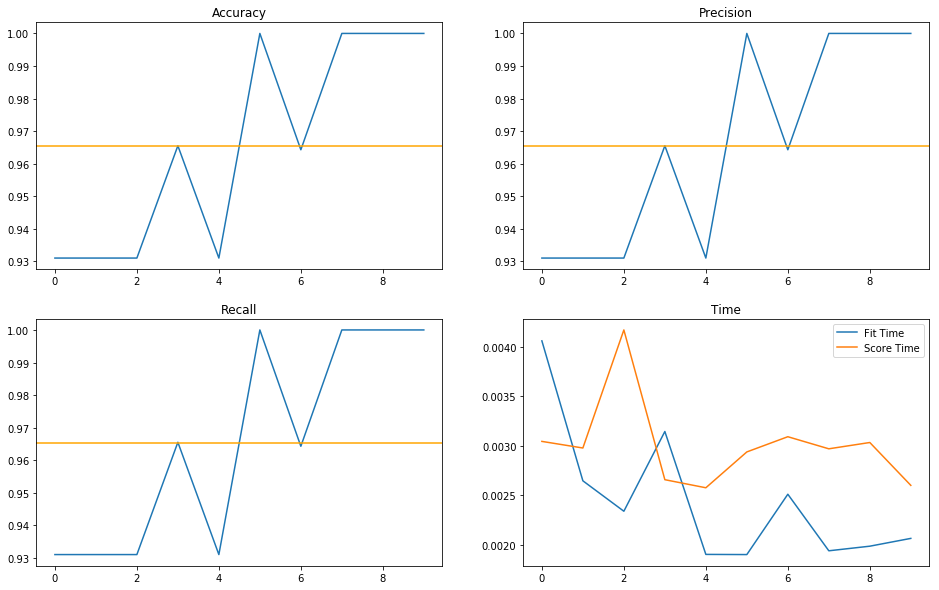

In [34]:
scores_gnb = cross_validate(gnb, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)

plot_summary(scores_gnb)

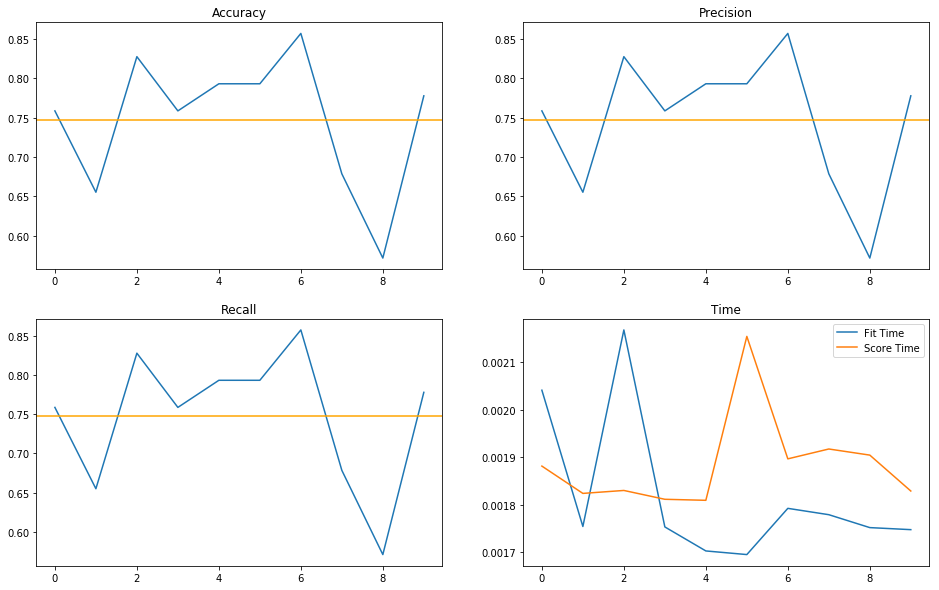

In [43]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

Xdata_disc = Xdata

for i in range(0,Xdata.shape[1]):
    quantiles = Xdata.iloc[:,i].quantile([0,0.2,0.4,0.6,0.8,1])
    Xdata_disc.iloc[:,i] = pd.cut(Xdata.iloc[:,i], quantiles, include_lowest=True)

for i in range(0,Xdata.shape[1]):
    lable_encoder = LabelEncoder()
    Xdata_disc.iloc[:,i] = lable_encoder.fit_transform(Xdata_disc.iloc[:,i])    
    
scores_mnb = cross_validate(mnb, Xdata_disc, Ydata, cv=10, scoring=scoring, return_train_score=False)



plot_summary(scores_mnb)

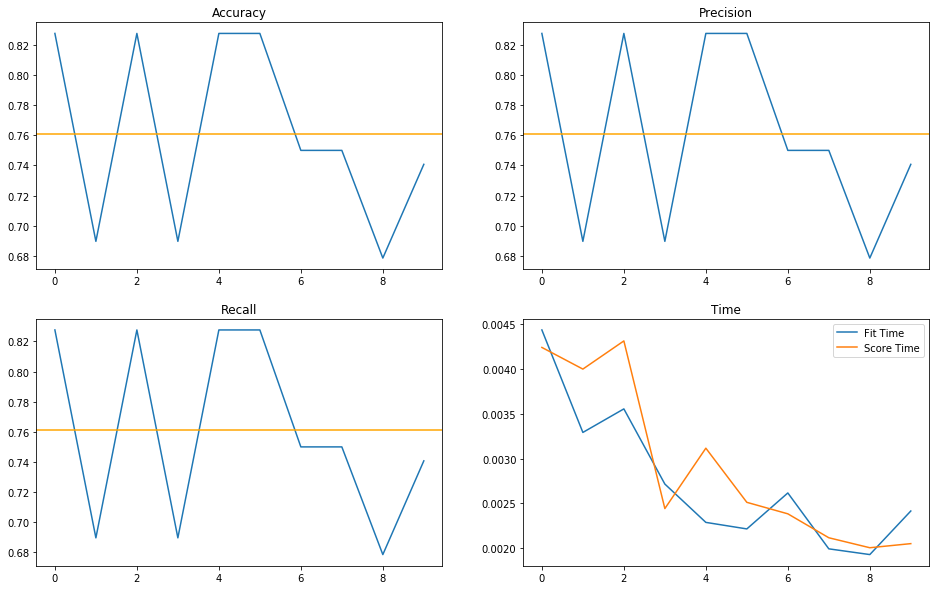

In [44]:
scores_bnb = cross_validate(bnb, Xdata_disc, Ydata, cv=10, scoring=scoring, return_train_score=False)
plot_summary(scores_bnb)

## Random Forest

In [49]:
def test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1):
    scoring = ["accuracy", "precision_micro", "recall_micro"]
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    precision_mean = []
    precision_std = []
    recall_mean = []
    recall_std = []
    
    xaxis = []
    
    for i in range(10, 201, 10):
        xaxis.append(i)
    
    for i in range(10, 201, 10):
        rfc = RandomForestClassifier(n_estimators=i, criterion=criterion, min_samples_split=min_samples_split)
        scores = cross_validate(rfc, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
    
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        precision_mean.append(scores["test_precision_micro"].mean())
        precision_std.append(scores["test_precision_micro"].std())
        recall_mean.append(scores["test_recall_micro"].mean())
        recall_std.append(scores["test_recall_micro"].std())
    
    ### Summary Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(xaxis, accuracy_mean)
    plt.plot(xaxis, accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    plt.plot(xaxis, precision_mean)
    plt.plot(xaxis, precision_std)
    plt.title("Precision")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,3)
    plt.plot(xaxis, recall_mean)
    plt.plot(xaxis, recall_std)
    plt.title("Recall")
    plt.xlabel("Number of estimators")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,4)
    plt.plot(xaxis, fit_time)
    plt.plot(xaxis, score_time)
    plt.title("Time")
    plt.xlabel("Number of estimators")
    plt.legend(("Fit Time", "Score Time"))

In [ ]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

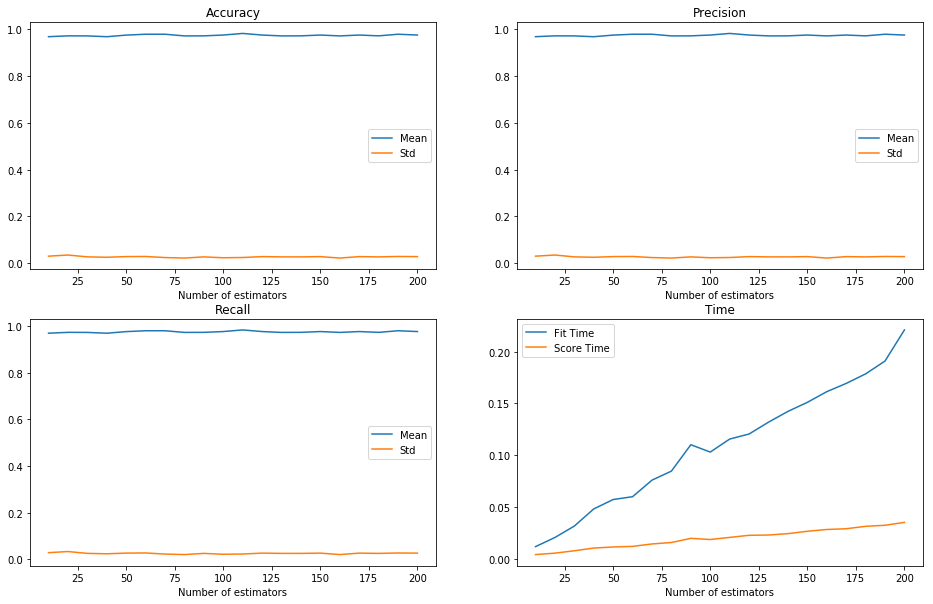

In [50]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1)

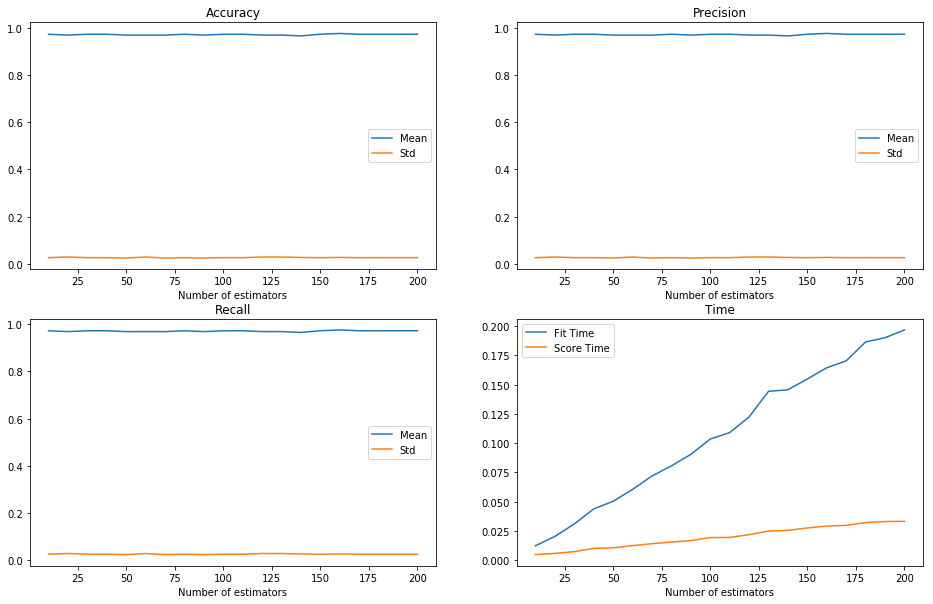

In [51]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 5, min_samples_leaf = 1)

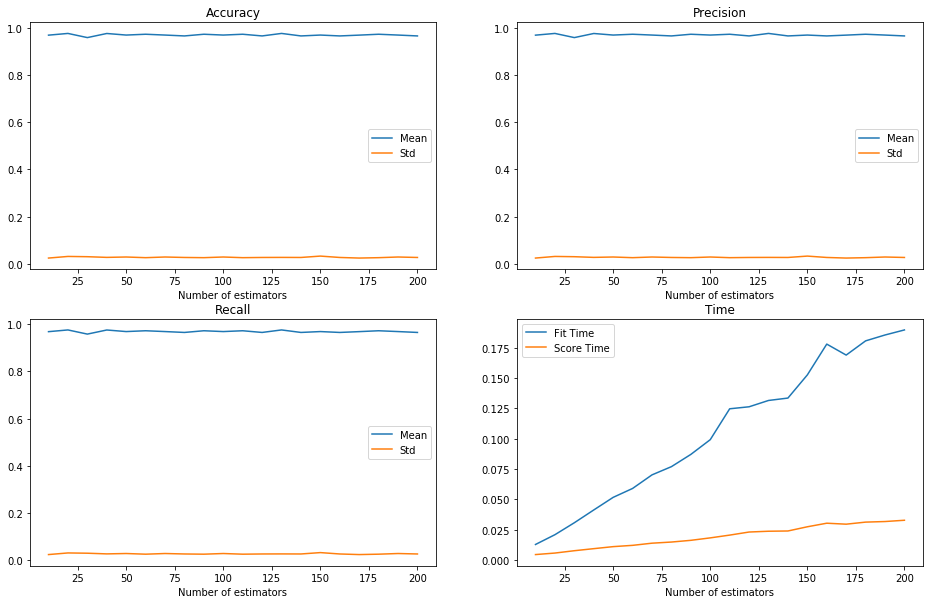

In [52]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 10, min_samples_leaf = 1)

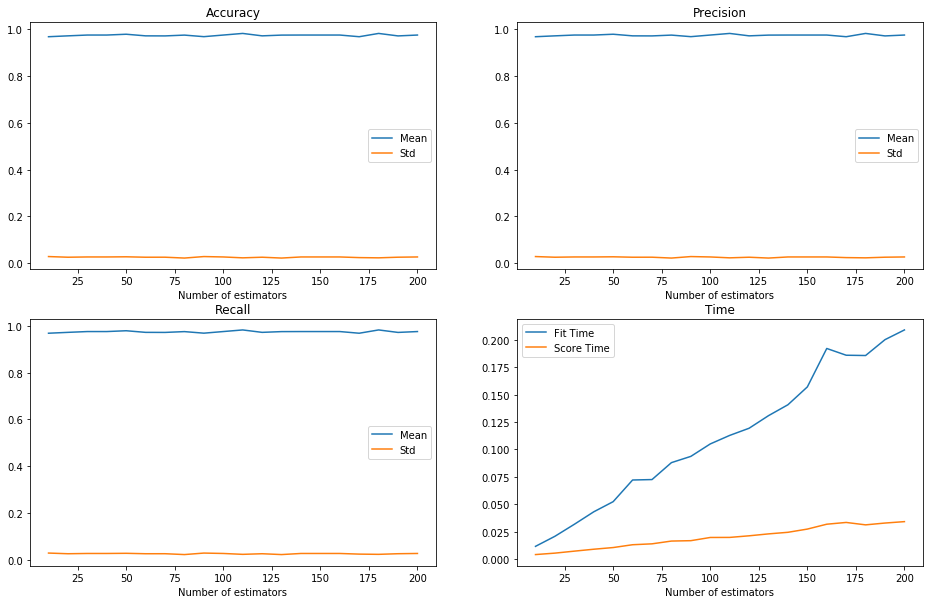

In [53]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

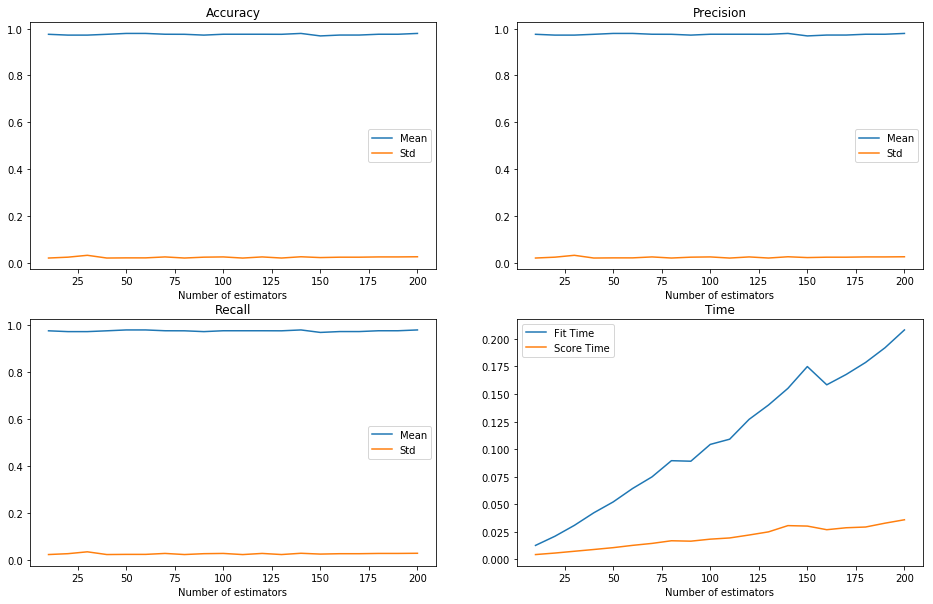

In [54]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 5, min_samples_leaf = 1)

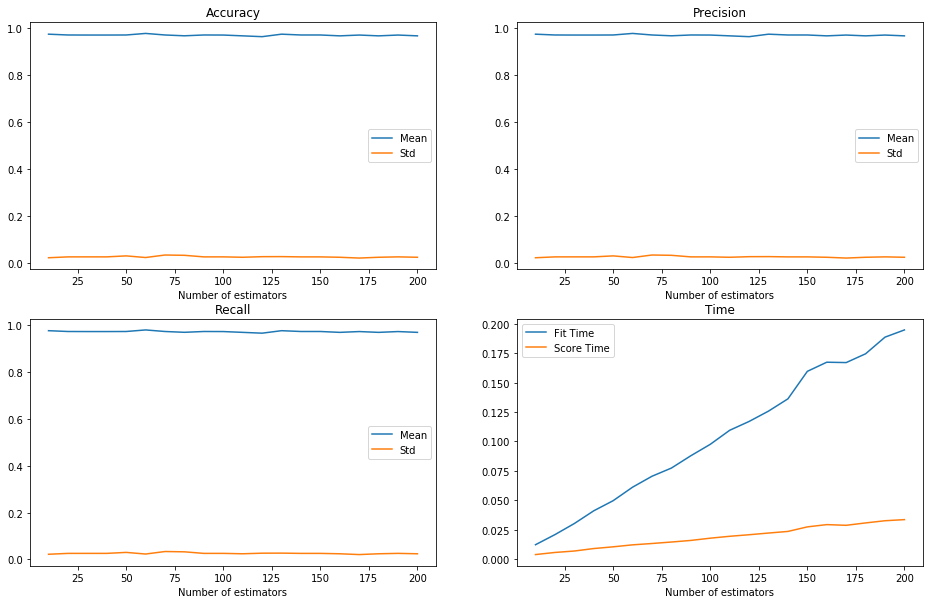

In [55]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 10, min_samples_leaf = 1)